In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random 
import time
from scipy.stats import rankdata

In [2]:
def TDT(n):
    b = n[0] + n[2] + 2*n[3]
    c = n[1] + n[2] + 2*n[4]
    
    if b == 0 and c == 0:
        return 0
    elif b == 0:
        return 1000000000
    else:
        return (b-c)**2/(b+c)

999998
999997
999996
999990
999992
999994
999999
999991
999995
999993


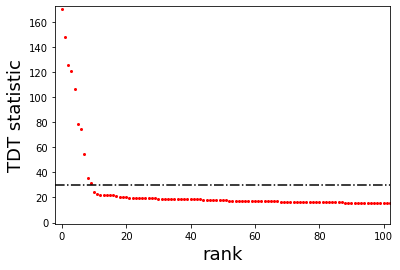

In [3]:
N = 5000
M = 1000000
S = np.zeros(M)
b = np.zeros(M)
c = np.zeros(M)

n = np.zeros((M,6))

for i in range(M-10):
    S[i] = random.randint(0,2*N)
    b[i] = np.random.binomial(S[i],0.5)
    c[i] = S[i] - b[i]
    n[i][0] = b[i]
    n[i][1] = c[i]
    n[i][5] = 2*N - b[i] - c[i]

for i in range(M-10, M):
    S[i] = random.randint(0,2*N)
    b[i] = np.random.binomial(S[i],0.56)
    c[i] = S[i] - b[i]
    n[i][0] = b[i]
    n[i][1] = c[i]
    n[i][5] = 2*N - b[i] - c[i]
    
stats = np.zeros(M)
order = np.zeros(M)

for i in range(M):
    order[i] = i
    if b[i] == 0 and c[i] == 0:
        stats[i] = 0
    else:
        stats[i] = (b[i]-c[i])**2/(b[i]+c[i])

x = np.argsort(stats)
for i in range(10):
    print(x[M-1-i])

nn = np.zeros((M,6))
for i in range(M):
    nn[i] = n[x[M-1-i]]

sorted_stats = sorted(stats, reverse=True)
#print(sorted_stats)

fig = plt.figure()
plt.ylim(-1, max(stats)+2)
plt.xlim(-2, 102)
plt.plot(order, sorted_stats, marker="o", markersize=2, color = "red", linestyle = "None")
plt.axhline(29.7, color = "black", linestyle = "-.")
plt.xlabel("rank", fontsize = 18)
plt.ylabel("TDT statistic", fontsize = 18)
fig.savefig("stats_large.png")
fig.savefig("figs/stats_large.eps")